<h1 style="font-size:36px;">Convolutional Neural Network(CNN)</h1>

CNN architecture includes several convolutional layers followed by several fully connected layers. A matrix of Bitcoin price data over the time range is used as input. Convolutional layers create feature maps by acting on the input matrix of the filters. Fully connected layers flatten the feature maps and render them into the output layer. When this architecture is used for Bitcoin price prediction, it allows to learn visual features of historical price data and use these features to predict future prices.

CNN mimarisi, birkaç evrişimli katman ve ardından birkaç tam bağlantılı katman içerir. Girdi olarak, zaman aralığındaki Bitcoin fiyat verilerinin bir matrisi kullanılır. Evrişimli katmanlar, filtrelerin girdi matrisi üzerinde hareket ederek özellik haritalarını oluşturur. Tam bağlantılı katmanlar, özellik haritalarını düzleştirir ve çıktı katmanına doğru işler. Bu mimari, Bitcoin fiyat tahmini için kullanıldığında, geçmiş fiyat verilerinin görsel özelliklerini öğrenmeyi ve bu özelliklerin gelecekteki fiyatları tahmin etmek için kullanılmasını sağlar.

<h1 style="font-size:15px;">Summary of the Model</h1>

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 56, 128)           768       
                                                                 
 conv1d_1 (Conv1D)           (None, 52, 128)           82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 26, 128)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3328)              0         
                                                                 
 dense (Dense)               (None, 1)                 3329      
                                                                 
Total params: 86,145
Trainable params: 86,145
Non-trainable params: 0
____________________________________________________

Model 2 uses one Conv1D layer containing 128 neurons and another Conv1D layer containing 128 neurons, and then reduces the size using a MaxPooling1D layer. It then creates an intermediate output using a Dense layer, and finally uses a Dense layer containing a single output neuron, the output layer. Model 2 has 86,145 trainable parameters.

Model 2, 128 adet nöron içeren bir Conv1D katmanı ve 128 adet nöron içeren bir diğer Conv1D katmanı kullanır ve ardından bir MaxPooling1D katmanı kullanarak boyutu indirir. Daha sonra, bir Yoğun katmanı kullanarak bir ara çıktı oluşturur ve son olarak, çıkış katmanı olan tek bir çıktı nöronu içeren bir Yoğun katman kullanır. Model 2, 86,145 eğitilebilir parametreye sahiptir.

<h1 style="font-size:15px;">Model Outputs</h1>

In [86]:
print(CNN2_ERROR)

         MSE        RMSE         MAE      R2
3.410330e+06 1846.708014 1305.495243 0.98183



<h3 style="font-size:24px;">Data preprocessing and Preparation</h3>

In [46]:
#import libraries
import yfinance as yf

import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Conv1D, MaxPooling1D
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error 
plt.style.use('fivethirtyeight')

In [47]:
#get the stock quote
df= yf.Ticker("BTC-USD").history(period='max', interval='1d')
df.reset_index(inplace=True)
#show the data
df


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...,...
3146,2023-04-29 00:00:00+00:00,29336.566406,29452.455078,29088.042969,29248.488281,10662634333,0.0,0.0
3147,2023-04-30 00:00:00+00:00,29245.515625,29952.029297,29114.021484,29268.806641,14652199272,0.0,0.0
3148,2023-05-01 00:00:00+00:00,29227.103516,29329.935547,27680.792969,28091.568359,18655599976,0.0,0.0
3149,2023-05-02 00:00:00+00:00,28087.175781,28881.298828,27924.123047,28680.537109,16432924527,0.0,0.0


In [48]:
df.isnull().values.any()
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,3151.000000,3151.000000,3151.000000,3151.000000,3.151000e+03,3151.0,3151.0
mean,13307.842008,13638.710313,12944.599715,13315.547039,1.661468e+10,0.0,0.0
std,16044.584565,16451.662058,15578.323850,16042.134948,1.971105e+10,0.0,0.0
min,176.897003,211.731003,171.509995,178.102997,5.914570e+06,0.0,0.0
25%,733.960510,741.238983,717.250000,735.493011,1.163520e+08,0.0,0.0
50%,7417.799805,7574.195801,7270.959961,7422.652832,9.353916e+09,0.0,0.0
75%,19257.741211,19550.404297,18925.694336,19268.730469,2.793474e+10,0.0,0.0
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11,0.0,0.0


In [49]:
#get the number of rows and columns in the data set
df.shape

(3151, 8)

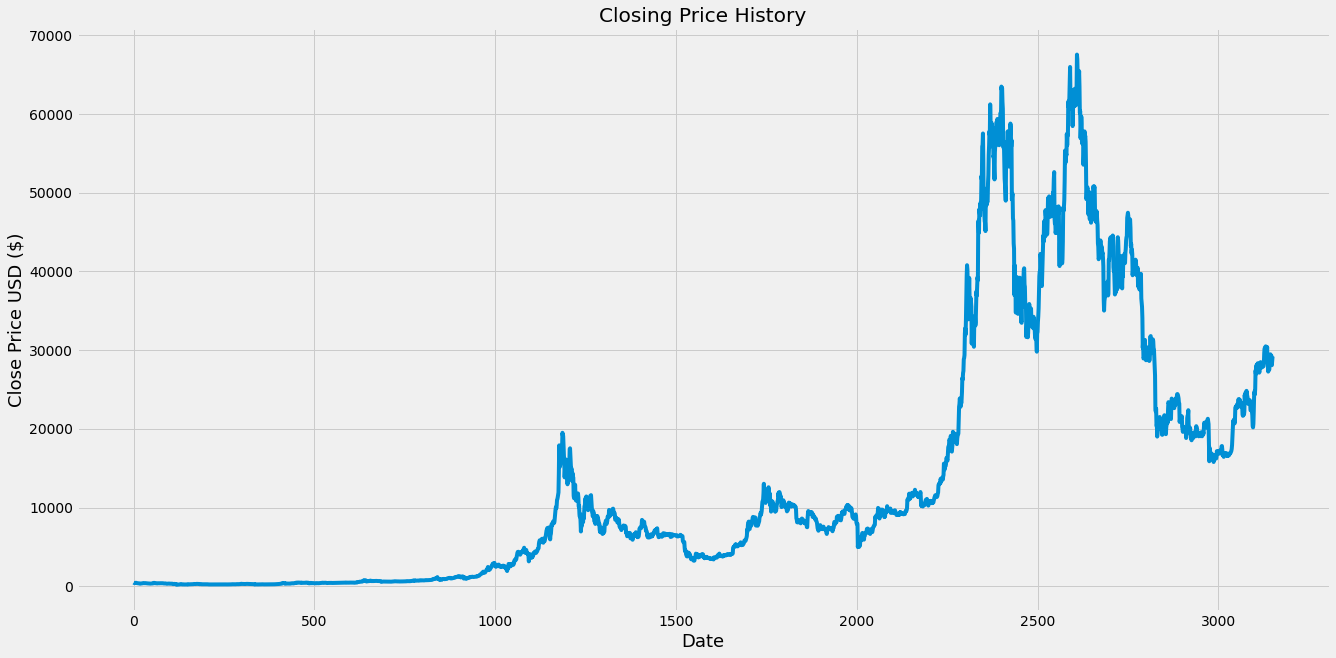

In [50]:
#visualize the closing price history
plt.figure(figsize=(20,10))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [51]:
#create a new dataframe with only the "Close column"
data = df.filter(['Close'])
#convert the dataframe to a numpy array
dataset = data.values
#get the number of rows to train the model on (80%)
training_data_len = math.ceil(len(dataset)*.8)

training_data_len 

2521

In [52]:
#Scale the data (normalization)
scaler =  MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00414359],
       [0.00365546],
       [0.00321557],
       ...,
       [0.41421566],
       [0.42295553],
       [0.43051322]])

In [53]:
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.00292874, 0.00309905, 0.00304965,
       0.00292288, 0.00269198, 0.00223721, 0.00211322, 0.00225521,
       0.00234585, 0.00259445, 0.0027738 , 0.0027224 , 0.00273334,
       0.00297447, 0.00315054, 0.0033057 , 0.00321523, 0.00303393,
       0.00305177, 0.0031658 , 0.00313766, 0.00303822, 0.00309209,
       0.00304287, 0.00267573, 0.00267466, 0.00251033, 0.00262063,
       0.00259518, 0.00266387, 0.00233701, 0.00248116, 0.00237752,
       0.00219096, 0.00219308, 0.00221774, 0.00226134, 0.00239481,
       0.00254029, 0.00243827, 0.00248387, 0.00274766, 0.00280197,
       0.00281341, 0.00364242, 0.00360048, 0.00326041, 0.00293862])]
[0.0031129686946921404]

[array([0.00414359, 0.00365546, 0.00321557, 0.00342492, 0.0032753 ,
       0.00332473, 0.0038239 , 0.00363714, 0.00346454, 0.00335845,
       0.00328567, 0.00295417, 0.

In [54]:
#convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data (CNN expects 2 dimentionals)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2461, 60, 1)

In [55]:
#build CNN model
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape = (x_train.shape[1], 1)))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(1))

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 56, 128)           768       
                                                                 
 conv1d_3 (Conv1D)           (None, 52, 128)           82048     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 26, 128)          0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3328)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 3329      
                                                                 
Total params: 86,145
Trainable params: 86,145
Non-trainable params: 0
__________________________________________________

In [57]:
#compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

In [74]:
#train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=20)

Epoch 1/20
77/77 [==============================] - 1s 8ms/step - loss: 2.9855e-04
Epoch 2/20
77/77 [==============================] - 1s 8ms/step - loss: 2.5130e-04
Epoch 3/20
77/77 [==============================] - 1s 8ms/step - loss: 2.4994e-04
Epoch 4/20
77/77 [==============================] - 1s 8ms/step - loss: 2.5085e-04
Epoch 5/20
77/77 [==============================] - 1s 8ms/step - loss: 2.4765e-04
Epoch 6/20
77/77 [==============================] - 1s 9ms/step - loss: 2.5057e-04
Epoch 7/20
77/77 [==============================] - 1s 9ms/step - loss: 2.5263e-04
Epoch 8/20
77/77 [==============================] - 1s 9ms/step - loss: 2.4406e-04
Epoch 9/20
77/77 [==============================] - 1s 8ms/step - loss: 2.5194e-04
Epoch 10/20
77/77 [==============================] - 1s 9ms/step - loss: 2.4304e-04
Epoch 11/20
77/77 [==============================] - 1s 9ms/step - loss: 2.4538e-04
Epoch 12/20
77/77 [==============================] - 1s 9ms/step - loss: 2.4059e-04
E

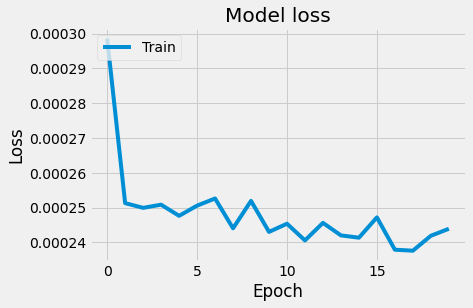

In [75]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [76]:
#create the testing data set
#create a new array containing scaled values from index 
test_data = scaled_data[training_data_len - 60: , : ]
#create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [77]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [78]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [79]:
#get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

20/20 [==============================] - 0s 3ms/step


In [80]:
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
MSE = mean_squared_error(y_test, predictions  )
MSE


3410330.487277968

In [81]:
RMSE =np.sqrt(MSE)
RMSE

1846.7080135413848

In [82]:
#get the mean absolute error (average of the forecast error values - all of em forced to be positive)
MAE = mean_absolute_error(y_test, predictions)
print(mae)

2362.7059771825398


In [83]:
R2= r2_score( y_test, predictions)
R2

0.9818299834499976

In [84]:
import pandas as pd

# Değerleri bir sözlük yapısında sakla
results = {'MSE': [MSE], 'RMSE': [RMSE], 'MAE': [MAE], 'R2': [R2]}

# DataFrame oluştur ve index değerlerini varsayılan değerlerle ata
CNN2_ERROR= pd.DataFrame.from_dict(results, orient='index').T

# DataFrame'i ERROR ismiyle kaydet
CNN2_ERROR = CNN2_ERROR.to_string(index=False)

# ERROR'u yazdır

print(CNN2_ERROR)

         MSE        RMSE         MAE      R2
3.410330e+06 1846.708014 1305.495243 0.98183


In [85]:
#define MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
#get MAPE
mape = mean_absolute_percentage_error(y_test, predictions)
print(mape)

3.939951151337336


<ipython-input-23-2d3135804f7c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


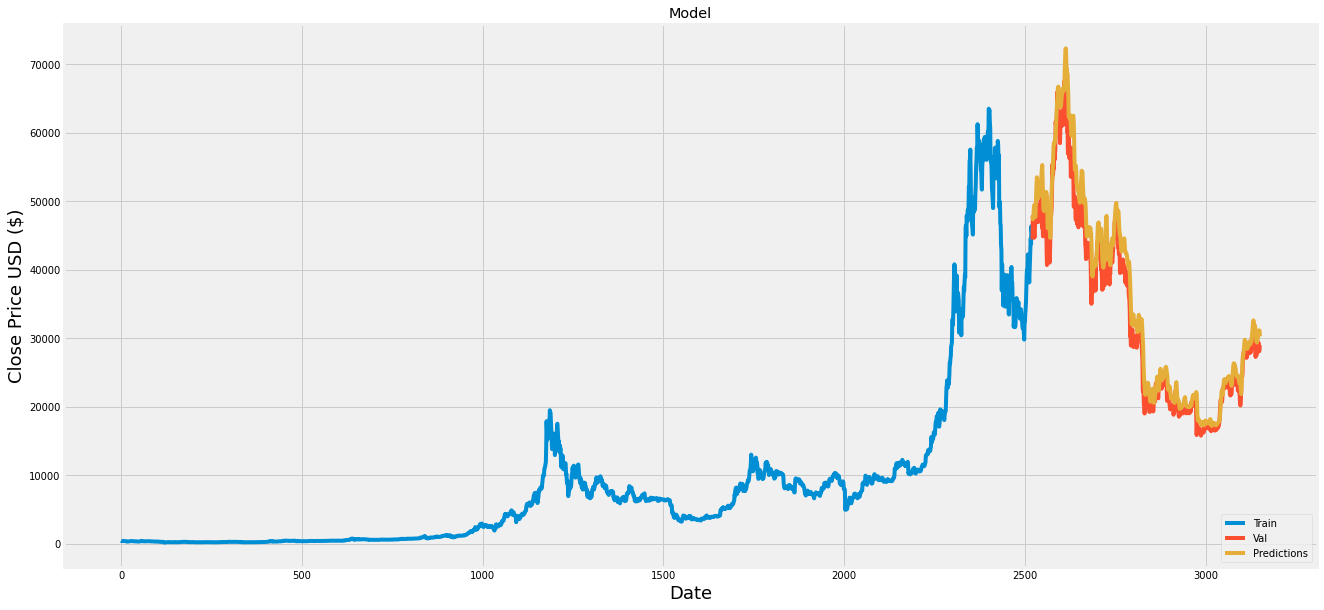

In [23]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<ipython-input-25-0831876e295c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


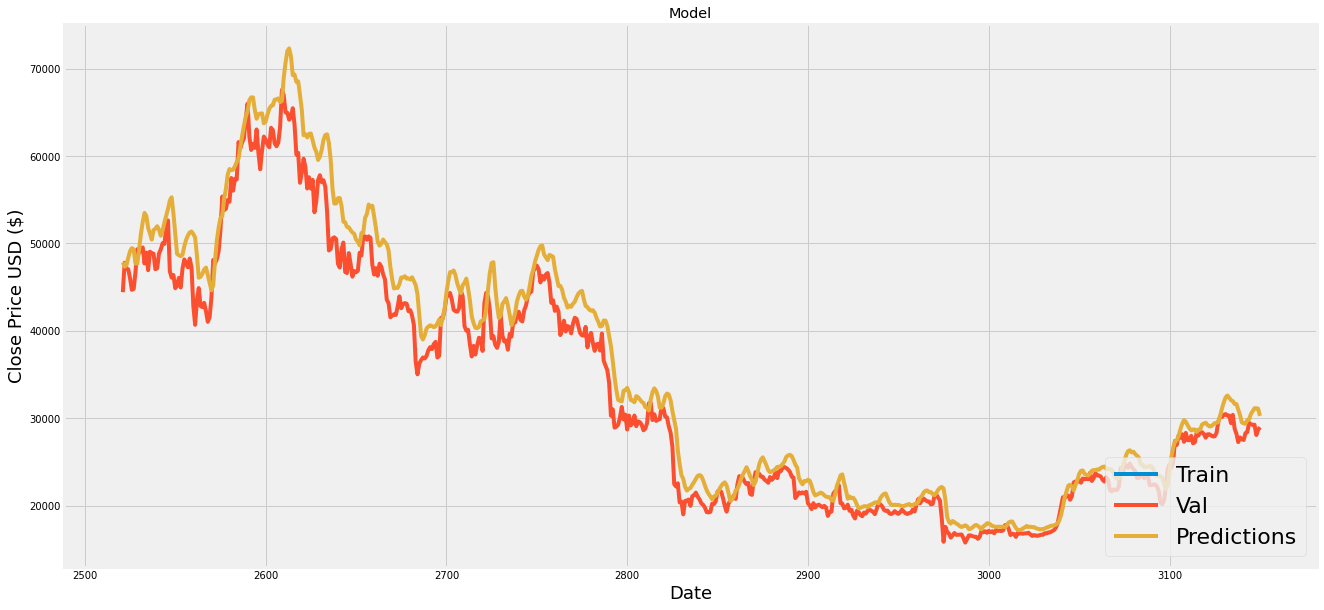

In [25]:
#plot zoomed in
train = data[2520:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(20,10))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right',fontsize=22)
plt.show()

In [26]:
#show the valid and predicted prices
valid

,Close,Predictions
2521,44428.289062,47831.769531
2522,47793.320312,47353.214844
2523,47096.945312,47496.808594
2524,47047.003906,48373.804688
2525,46004.484375,49123.746094
...,...,...
3146,29248.488281,30815.748047
3147,29268.806641,31155.884766
3148,28091.568359,31146.228516
3149,28680.537109,31108.945312
